In [24]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path
from tqdm import tqdm
folder = Path.cwd().parent
import matplotlib.pyplot as plt
# pd.set_option("display.precision", 2)

number = '042'

In [25]:
combined = True

main_path = folder / '_storage' / 'main' / number

file= open(main_path / "info.txt","r") 
print(file.read())
file.close()  

if combined == True:
    print('1')
    
    combined_network = pd.read_csv(main_path / 'combined_network.csv').drop('Unnamed: 0',axis=1)

    print('2')
    
    combined_vessels = pd.read_csv(main_path / 'combined_vessels.csv').rename(columns={'Unnamed: 1':'V no','Unnamed: 0':'time step'})

    print('3')  
else:
    print('1')
    
#     network = pd.read_csv(main_path / 'network.csv')

    pickle_in = open(main_path / 'network.pickle'  , 'rb' )
    network = pickle.load(pickle_in)
    pickle_in.close()

    print('2')

    pickle_in2 = open(main_path / 'changes.pickle' , 'rb' )
    RK4 = pickle.load(pickle_in2)
    pickle_in2.close()

    print('3')

    pickle_in3 = open(main_path / 'vessels.pickle' , 'rb' )
    vessels_alltime = pickle.load(pickle_in3)
    pickle_in3.close()

    print('4')
    
v = com_vessels
n = com_network

Time of simulation: 600 seconds
Number of iterations: 225001
therefore time step is: 0.0026666666666666666 seconds
Delay for pressure drop: 2 seconds
Time over which pressure drops: 2 seconds
Alpha: 0.3
delay: 2.99
Ratio pressure drop: 0.5
kp_constant: 0.0033333333333333335
kn_constant: 0.0016666666666666668
Date and time: 2020-04-13 01:11:34.315622
R: 1
k: 0.1
tau_c: 0.0016666666666666668
save_changes: True

1
2
3


In [63]:
def get_vessel(vessel):
    out = combined_vessels[combined_vessels['Name'] == vessel]
    return out

def save_v(vessel):
    out = combined_vessels[combined_vessels['Name'] == vessel]
    
    return out

def plt_v_t(column_string,vessel):
    out = combined_vessels[combined_vessels['Name'] == vessel]
    
    fig = plt.figure()
    plt.plot(combined_network['t'][0:len(out[column_string])],out[column_string])
    plt.title(vessel)
    plt.ylabel(column_string)
    plt.xlabel('Time / seconds')
    plt.ylim(bottom=0)
    plt.grid(which='both')
#     plt.savefig(main_path / vessel + '_' + column_string + 'vs_t')

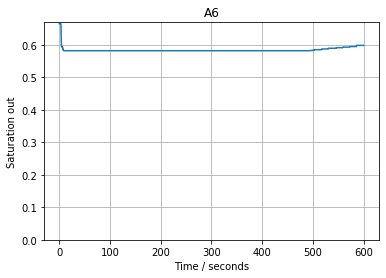

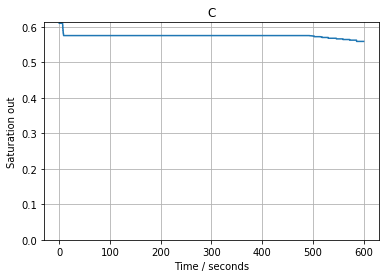

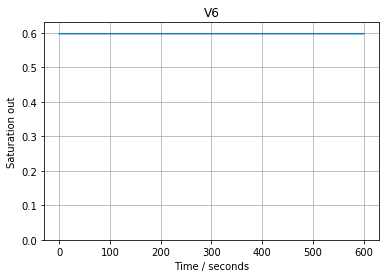

In [62]:
plt_v_t('Saturation out','A6')
plt_v_t('Saturation out','C')
plt_v_t('Saturation out','V6')

In [70]:
A6 = save_v('A6').reset_index()

In [153]:
short = combined_vessels[~np.isnan(combined_vessels['dSoutdt'])]
all_nz = short[short['dSoutdt'] != 0.0]
all_nz.to_csv('all_non_zero_Sout.csv')

In [156]:
display(all_nz[0:10])
# display(all_nz[0:50])
# display(all_nz[51:100])
# display(all_nz[101:150])
# display(all_nz[151:200])

,time step,V no,Name,Number,Diameter(µm),Length(µm),Saturation in,Saturation out,Sav,Resistance for Q,...,pt_by_Vt,M,0,1,2,3,4,dptdt,dSoutdt,dSindt
15228,1171,5,A6,32,7.32,154.7,0.765000,0.662778,0.714333,0.000020,...,2.662482e+07,0.000746,0.000307,-674.758766,17.132427,8438.518798,0.0,-0.027879,-0.333333,0.0
15579,1198,5,A6,32,7.32,154.7,0.765000,0.662333,0.713889,0.000020,...,2.659902e+07,0.000746,0.000307,-674.758766,17.123099,8298.001127,0.0,-0.074237,-0.166667,0.0
15657,1204,5,A6,32,7.32,154.7,0.765000,0.660111,0.713000,0.000020,...,2.659296e+07,0.000746,0.000307,-674.758766,17.069693,8393.794315,0.0,-0.126132,-0.333333,0.0
15982,1229,5,A6,32,7.32,154.7,0.765000,0.657889,0.711889,0.000020,...,2.654709e+07,0.000745,0.000307,-674.758766,17.032546,8366.601757,0.0,-0.181025,-0.333333,0.0
16124,1240,4,A5,16,9.46,161.2,0.840000,0.762778,0.801833,0.000008,...,4.744606e+07,0.000757,0.000177,-873.141055,19.762887,11848.058973,0.0,-0.037808,-0.333333,0.0
16138,1241,5,A6,32,7.32,154.7,0.762778,0.656111,0.709667,0.000020,...,2.651533e+07,0.000745,0.000307,-674.758766,16.913143,8267.423997,0.0,-0.401308,-0.166667,0.0
16333,1256,5,A6,32,7.32,154.7,0.762778,0.655667,0.709444,0.000020,...,2.645410e+07,0.000745,0.000307,-674.758766,16.945753,8177.492608,0.0,-0.350627,-0.166667,0.0
16398,1261,5,A6,32,7.32,154.7,0.762778,0.653444,0.708556,0.000020,...,2.643511e+07,0.000745,0.000307,-674.758766,16.903169,8271.576567,0.0,-0.383773,-0.333333,0.0
16566,1274,4,A5,16,9.46,161.2,0.840000,0.762333,0.801389,0.000008,...,4.738367e+07,0.000757,0.000177,-873.141055,19.751929,11578.866752,0.0,-0.094876,-0.166667,0.0
16632,1279,5,A6,32,7.32,154.7,0.762333,0.651222,0.707222,0.000020,...,2.635693e+07,0.000745,0.000307,-674.758766,16.877714,8252.703986,0.0,-0.416724,-0.333333,0.0


In [157]:
def time_step_display(com_network,com_vessels,i):
    if i != 0:
        display(com_network.iloc[[i-1,i,i+1],:])
    else:
        display(com_network.iloc[[i,i+1],:])
    
    display(com_vessels[com_vessels['time step'] == i-1])
    display(com_vessels[com_vessels['time step'] == i])
    display(com_vessels[com_vessels['time step'] == i+1])

pd.set_option('display.max_columns', None)
time_step_display(combined_network,combined_vessels,1171)

,t,pressure_difference,phi,phi_min,R_tot,Q_tot,Q_norm,pt_averaged,kp_p,kp_n,Ap,Dp,kn_p,kn_n,An,Dn,c,dphidt,dApdt,dDpdt,dAndt,dDndt,dcdt
1170,3.120000,24.609600,0.991951,0.823967,0.000009,2.670748e+06,0.719179,44.11383,1.513262e-07,0.003333,1.0,1.110717e-13,0.001666,5.233689e-07,0.998677,8.757039e-07,1.219975,-0.021611,-1.497599e-07,7.110680e-14,-0.001664,0.000002,0.373938
1171,3.122667,24.586813,0.991893,0.823547,0.000009,2.668261e+06,0.718509,44.11383,1.513262e-07,0.003333,1.0,1.112613e-13,0.001666,5.045843e-07,0.998672,8.815884e-07,1.220972,-0.021714,-1.497586e-07,7.116723e-14,-0.001664,0.000002,0.374556
1172,3.125333,24.564027,0.991836,0.823127,0.000009,2.665773e+06,0.717839,44.11383,1.513262e-07,0.003333,1.0,1.114511e-13,0.001666,4.864444e-07,0.998668,8.874927e-07,1.221971,-0.021817,-1.497573e-07,7.122767e-14,-0.001664,0.000002,0.375176


,time step,V no,Name,Number,Diameter(µm),Length(µm),Saturation in,Saturation out,Sav,Resistance for Q,Q in single(µm3/s),Vt(µm3),partial pressure blood(mmHg),X-Area wall(???),wall thickness(µm),tissue partials(mmHg),pt_by_Vt,M,0,1,2,3,4,dptdt,dSoutdt,dSindt
15210,1170,0,A1,1,23.970000,1267.6,0.9400,0.9300,0.93500,1.866110e-06,2.668261e+06,3.920026e+06,68.843131,438.213672,4.841407,65.682854,2.574785e+08,0.000795,0.000003,-11735.977579,3.160282,26682.605647,0.0,0.001757,0.0,0.0
15211,1170,1,A2,2,19.170000,930.3,0.9300,0.9200,0.92500,3.158317e-06,1.335410e+06,1.964399e+06,65.327798,313.016429,4.253658,62.960237,1.236790e+08,0.000794,0.000007,-7840.128462,2.367565,13354.096016,0.0,0.001318,0.0,0.0
15212,1170,2,A3,4,15.280000,543.6,0.9200,0.8900,0.90500,4.328170e-06,6.673504e+05,2.962124e+06,59.809062,228.546291,3.810683,52.981251,1.569370e+08,0.000789,0.000020,-4076.059891,6.827822,20020.510811,0.0,0.003774,0.0,0.0
15213,1170,3,A4,8,12.080000,302.3,0.8900,0.8400,0.86500,5.814403e-06,3.336497e+05,2.496394e+06,52.183980,170.463521,3.485850,40.345011,1.007170e+08,0.000780,0.000058,-1959.011293,11.838987,16682.486490,0.0,0.006422,0.0,0.0
15214,1170,4,A5,16,9.460000,161.2,0.8400,0.7650,0.80250,7.874816e-06,1.660593e+05,1.919460e+06,44.546726,130.572935,3.265971,24.713090,4.743575e+07,0.000758,0.000177,-873.141055,19.833662,12454.445932,0.0,0.009890,0.0,0.0
15215,1170,5,A6,32,7.320000,154.7,0.7650,0.6650,0.71500,2.025728e-05,8.335257e+04,1.304955e+06,37.579012,103.110791,3.138293,20.403004,2.662498e+07,0.000746,0.000307,-674.758766,17.176031,8335.256773,0.0,0.008585,0.0,0.0
15216,1170,6,C,64,7.935148,243.9,0.6650,0.6100,0.63750,4.513708e-05,4.170614e+04,3.486216e+05,33.077299,110.533353,3.168637,30.287396,1.055885e+07,0.000768,0.000166,-1142.181127,2.789863,2293.837611,0.0,-0.014981,0.0,0.0
15217,1170,7,V6,32,11.510000,473.9,0.6100,0.5975,0.60375,1.097658e-05,8.313213e+04,1.577403e+05,31.395007,161.197683,3.433626,30.908796,4.875562e+06,0.000769,0.000041,-2970.637650,0.486211,1039.151576,0.0,0.000275,0.0,0.0
15218,1170,8,V5,16,14.530000,272.3,0.5975,0.5875,0.59250,2.614226e-06,1.676559e+05,2.551342e+05,30.861700,214.009514,3.730525,29.686704,7.574092e+06,0.000767,0.000044,-1983.279383,1.174998,1676.558983,0.0,0.000656,0.0,0.0
15219,1170,9,V4,8,17.790000,426.6,0.5875,0.5825,0.58500,1.926676e-06,3.319047e+05,2.524554e+05,30.512889,281.309064,4.092089,29.847787,7.535234e+06,0.000767,0.000019,-3468.105643,0.665102,1659.523698,0.0,0.000374,0.0,0.0


,time step,V no,Name,Number,Diameter(µm),Length(µm),Saturation in,Saturation out,Sav,Resistance for Q,Q in single(µm3/s),Vt(µm3),partial pressure blood(mmHg),X-Area wall(???),wall thickness(µm),tissue partials(mmHg),pt_by_Vt,M,0,1,2,3,4,dptdt,dSoutdt,dSindt
15223,1171,0,A1,1,23.970000,1267.6,0.940000,0.930000,0.935000,1.866110e-06,2.665773e+06,3.920026e+06,68.843131,438.213672,4.841407,65.682868,2.574785e+08,0.000795,0.000003,-11735.977579,3.160268,26657.728950,0.0,0.001757,0.000000,0.000000
15224,1171,1,A2,2,19.170000,930.3,0.930000,0.920000,0.925000,3.158317e-06,1.334165e+06,1.964399e+06,65.327798,313.016429,4.253658,62.960248,1.236790e+08,0.000794,0.000007,-7840.128462,2.367554,13341.645740,0.0,0.001318,0.000000,0.000000
15225,1171,2,A3,4,15.280000,543.6,0.920000,0.890000,0.905000,4.328170e-06,6.667282e+05,2.962124e+06,59.809062,228.546291,3.810683,52.981281,1.569371e+08,0.000789,0.000020,-4076.059891,6.827791,20001.845312,0.0,0.003774,0.000000,0.000000
15226,1171,3,A4,8,12.080000,302.3,0.890000,0.840000,0.865000,5.814403e-06,3.333387e+05,2.496394e+06,52.183980,170.463521,3.485850,40.345062,1.007171e+08,0.000780,0.000058,-1959.011293,11.838935,16666.933094,0.0,0.006423,0.000000,0.000000
15227,1171,4,A5,16,9.460000,161.2,0.840000,0.765000,0.802500,7.874816e-06,1.659045e+05,1.919460e+06,44.546726,130.572935,3.265971,24.713170,4.743590e+07,0.000758,0.000177,-873.141055,19.833583,12442.834417,0.0,0.009896,0.000000,0.000000
15228,1171,5,A6,32,7.320000,154.7,0.765000,0.662778,0.714333,2.025728e-05,8.327486e+04,1.304955e+06,37.535282,103.110791,3.138293,20.402781,2.662482e+07,0.000746,0.000307,-674.758766,17.132427,8438.518798,0.0,-0.027879,-0.333333,0.000000
15229,1171,6,C,64,7.934685,243.9,0.662778,0.610000,0.636833,4.513708e-05,4.166725e+04,3.486216e+05,33.042741,110.527620,3.168612,30.285818,1.055847e+07,0.000768,0.000166,-1142.123465,2.756400,2236.142683,0.0,-0.196227,0.000000,-0.333333
15230,1171,7,V6,32,11.510000,473.9,0.610000,0.597500,0.603750,1.097658e-05,8.305462e+04,1.577403e+05,31.395007,161.197683,3.433626,30.908798,4.875563e+06,0.000769,0.000041,-2970.637650,0.486209,1038.182755,0.0,0.000275,0.000000,0.000000
15231,1171,8,V5,16,14.530000,272.3,0.597500,0.587500,0.592500,2.614226e-06,1.674996e+05,2.551342e+05,30.861700,214.009514,3.730525,29.686709,7.574093e+06,0.000767,0.000044,-1983.279383,1.174993,1674.995895,0.0,0.000656,0.000000,0.000000
15232,1171,9,V4,8,17.790000,426.6,0.587500,0.582500,0.585000,1.926676e-06,3.315953e+05,2.524554e+05,30.512889,281.309064,4.092089,29.847790,7.535235e+06,0.000767,0.000019,-3468.105643,0.665100,1657.976493,0.0,0.000374,0.000000,0.000000


,time step,V no,Name,Number,Diameter(µm),Length(µm),Saturation in,Saturation out,Sav,Resistance for Q,Q in single(µm3/s),Vt(µm3),partial pressure blood(mmHg),X-Area wall(???),wall thickness(µm),tissue partials(mmHg),pt_by_Vt,M,0,1,2,3,4,dptdt,dSoutdt,dSindt
15236,1172,0,A1,1,23.970000,1267.6,0.940000,0.930000,0.935000,1.866110e-06,2.663285e+06,3.920026e+06,68.843131,438.213672,4.841407,65.682882,2.574786e+08,0.000795,0.000003,-11735.977579,3.160254,26632.851784,0.0,0.001757,0.0,0.0
15237,1172,1,A2,2,19.170000,930.3,0.930000,0.920000,0.925000,3.158317e-06,1.332920e+06,1.964399e+06,65.327798,313.016429,4.253658,62.960258,1.236790e+08,0.000794,0.000007,-7840.128462,2.367544,13329.195229,0.0,0.001318,0.0,0.0
15238,1172,2,A3,4,15.280000,543.6,0.920000,0.890000,0.905000,4.328170e-06,6.661060e+05,2.962124e+06,59.809062,228.546291,3.810683,52.981311,1.569372e+08,0.000789,0.000020,-4076.059891,6.827761,19983.179459,0.0,0.003774,0.0,0.0
15239,1172,3,A4,8,12.080000,302.3,0.890000,0.840000,0.865000,5.814403e-06,3.330276e+05,2.496394e+06,52.183980,170.463521,3.485850,40.345114,1.007172e+08,0.000780,0.000058,-1959.011293,11.838884,16651.379403,0.0,0.006425,0.0,0.0
15240,1172,4,A5,16,9.460000,161.2,0.840000,0.765000,0.802500,7.874816e-06,1.657496e+05,1.919460e+06,44.546726,130.572935,3.265971,24.713249,4.743605e+07,0.000758,0.000177,-873.141055,19.833504,12431.222683,0.0,0.009902,0.0,0.0
15241,1172,5,A6,32,7.320000,154.7,0.765000,0.662778,0.713889,2.025728e-05,8.319714e+04,1.304955e+06,37.506187,103.110791,3.138293,20.401883,2.662394e+07,0.000746,0.000307,-674.758766,17.104005,8504.596934,0.0,-0.112058,0.0,0.0
15242,1172,6,C,64,7.934219,243.9,0.662778,0.610000,0.636389,4.513708e-05,4.162837e+04,3.486216e+05,33.019734,110.521860,3.168587,30.281040,1.055718e+07,0.000768,0.000166,-1142.065525,2.737108,2197.052904,0.0,-0.594995,0.0,0.0
15243,1172,7,V6,32,11.510000,473.9,0.610000,0.597500,0.603750,1.097658e-05,8.297711e+04,1.577403e+05,31.395007,161.197683,3.433626,30.908801,4.875563e+06,0.000769,0.000041,-2970.637650,0.486207,1037.213916,0.0,0.000275,0.0,0.0
15244,1172,8,V5,16,14.530000,272.3,0.597500,0.587500,0.592500,2.614226e-06,1.673433e+05,2.551342e+05,30.861700,214.009514,3.730525,29.686714,7.574094e+06,0.000767,0.000044,-1983.279383,1.174988,1673.432778,0.0,0.000656,0.0,0.0
15245,1172,9,V4,8,17.790000,426.6,0.587500,0.582500,0.585000,1.926676e-06,3.312859e+05,2.524554e+05,30.512889,281.309064,4.092089,29.847793,7.535236e+06,0.000767,0.000019,-3468.105643,0.665097,1656.429258,0.0,0.000374,0.0,0.0


In [74]:
def plt_v_t(column_string,vessel):
    out = combined_vessels[combined_vessels['Name'] == vessel]
    
    fig = plt.figure()
    plt.plot(out.index()[0:len(out[column_string])],out[column_string])
    plt.title(vessel)
    plt.ylabel(column_string)
    plt.xlabel('Time / seconds')
    plt.ylim(bottom=0)
    plt.grid(which='both')

In [75]:
plt_v_t('Saturation out','A6')

TypeError: 'Int64Index' object is not callable

<Figure size 432x288 with 0 Axes>

TypeError: 'RangeIndex' object is not callable